c:\Users\wjsrh\Desktop\전광민\01.MicroSoft_Bootcamp\9-1. 실습\notebooks\DL3_20241006\ch03


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_30700\2992492374.py:76: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


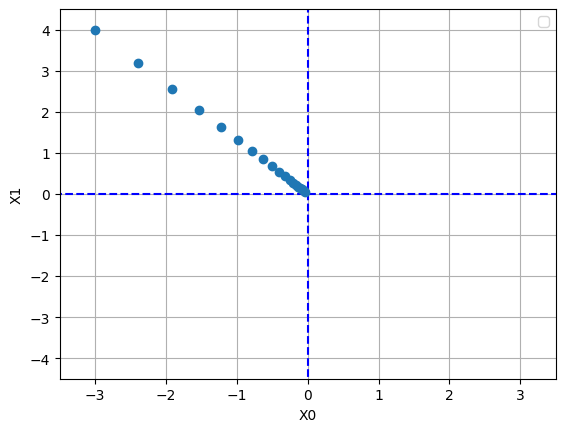

In [9]:
# coding: utf-8
import os, sys
print(os.getcwd())

import numpy as np
import matplotlib.pylab as plt

def _numerical_gradient_no_batch(f, x):
    h = 1e-4 #0.0001
    grad = np.zeros_like(x)

    for idx in range(x.size):
        tmp_val = x[idx]

        #f(x+h)계산
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)


        #f(x-h) 계산
        x[idx] = tmp_val - h
        fxh2 = f(x)


        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val

    
    return grad

def numerical_gradient(f,X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    
    else:
        grad = np.zeros_like(X)
        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)

        return grad


def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []

    for i in range(step_num):
        x_history.append(x.copy())

        grad = numerical_gradient(f, x)
        x -= lr * grad
    
    return x, np.array(x_history)

def function_2(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1)
    

init_x = np.array([-3.0,4.0])

lr = 0.1
step_num = 20
x, x_history = gradient_descent(function_2, init_x, lr=lr, step_num=step_num)

plt.plot([-5,5],[0,0],'--b')
plt.plot([0,0],[-5,5],'--b')
plt.plot(x_history[:,0],x_history[:,1],'o')
plt.xlim([-3.5,3.5])
plt.ylim([-4.5,4.5])
plt.xlabel("X0")
plt.ylabel("X1")
plt.grid()
plt.legend()
plt.draw()
plt.show()

